In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time
from datetime import datetime as dt

In [2]:
df1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220507.txt")

df2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220514.txt")

df3 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220521.txt")

df4 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220528.txt")

df5 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220604.txt")

In [3]:
dfmay = pd.concat([df1,df2, df3, df4, df5], ignore_index=True) 

In [4]:
dfmay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055980 entries, 0 to 1055979
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   1055980 non-null  object
 1   UNIT                                                                  1055980 non-null  object
 2   SCP                                                                   1055980 non-null  object
 3   STATION                                                               1055980 non-null  object
 4   LINENAME                                                              1055980 non-null  object
 5   DIVISION                                                              1055980 non-null  object
 6   DATE                                                                  1055980 non-

In [5]:
dfmay["DATE"]+" "+ dfmay["TIME"]

0          04/30/2022 00:00:00
1          04/30/2022 04:00:00
2          04/30/2022 08:00:00
3          04/30/2022 12:00:00
4          04/30/2022 16:00:00
                  ...         
1055975    06/03/2022 05:00:00
1055976    06/03/2022 09:00:00
1055977    06/03/2022 13:00:00
1055978    06/03/2022 17:00:00
1055979    06/03/2022 21:00:00
Length: 1055980, dtype: object

In [6]:
datettimes = pd.to_datetime(dfmay["DATE"] + " " + dfmay["TIME"])

In [7]:
dfmay.insert(loc = 11,column = "datetime", value = datettimes )

In [8]:
turnstiles = dfmay["C/A"] + dfmay["UNIT"] + dfmay["SCP"]

In [9]:
dfmay.insert(loc = 12,column = "turnstile", value = turnstiles )

In [10]:
dfmay.drop(columns = ["C/A", "UNIT", "SCP", "DATE", "TIME"], inplace = True)

In [11]:
dfmay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055980 entries, 0 to 1055979
Data columns (total 8 columns):
 #   Column                                                                Non-Null Count    Dtype         
---  ------                                                                --------------    -----         
 0   STATION                                                               1055980 non-null  object        
 1   LINENAME                                                              1055980 non-null  object        
 2   DIVISION                                                              1055980 non-null  object        
 3   DESC                                                                  1055980 non-null  object        
 4   ENTRIES                                                               1055980 non-null  int64         
 5   EXITS                                                                 1055980 non-null  int64         
 6   datetime           

In [12]:
dfmay.rename(columns = lambda x: x.strip(), inplace = True)

In [13]:
dfmay.insert(loc = 8,column= "density",value = dfmay["ENTRIES"] + dfmay["EXITS"])

In [14]:
dfmay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055980 entries, 0 to 1055979
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   STATION    1055980 non-null  object        
 1   LINENAME   1055980 non-null  object        
 2   DIVISION   1055980 non-null  object        
 3   DESC       1055980 non-null  object        
 4   ENTRIES    1055980 non-null  int64         
 5   EXITS      1055980 non-null  int64         
 6   datetime   1055980 non-null  datetime64[ns]
 7   turnstile  1055980 non-null  object        
 8   density    1055980 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 72.5+ MB


In [15]:
dfmay['datetime'].dt.dayofweek

0          5
1          5
2          5
3          5
4          5
          ..
1055975    4
1055976    4
1055977    4
1055978    4
1055979    4
Name: datetime, Length: 1055980, dtype: int64

In [16]:
dfmay['day'] = dfmay['datetime'].dt.day_name()

In [20]:
dfmay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055980 entries, 0 to 1055979
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   STATION    1055980 non-null  object        
 1   LINENAME   1055980 non-null  object        
 2   DIVISION   1055980 non-null  object        
 3   DESC       1055980 non-null  object        
 4   ENTRIES    1055980 non-null  int64         
 5   EXITS      1055980 non-null  int64         
 6   datetime   1055980 non-null  datetime64[ns]
 7   turnstile  1055980 non-null  object        
 8   density    1055980 non-null  int64         
 9   day        1055980 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 80.6+ MB


In [52]:
densities = dfmay.groupby('STATION').density.sum()

In [77]:
densities.sort_values(ascending = False, inplace = True)

In [78]:
densities.head(20)

STATION
125 ST             3367660916270
42 ST-PORT AUTH    2852531355651
FULTON ST          2631066807907
23 ST              2438797316447
DEKALB AV          2305024711093
TIMES SQ-42 ST     2095208685518
34 ST-PENN STA     2059953962773
CANAL ST           1996256399189
161/YANKEE STAD    1691967360454
183 ST             1547039757358
34 ST-HERALD SQ    1500266665304
HUNTS POINT AV     1474626043279
14 ST              1373409218931
CHAMBERS ST        1343848000899
167 ST             1337998098319
72 ST-2 AVE        1322345368909
59 ST COLUMBUS     1291828264120
18 AV              1281785750245
LEXINGTON AV/53    1276006500622
135 ST             1175159577376
Name: density, dtype: int64

In [79]:
dens = densities.head(30)

<BarContainer object of 30 artists>

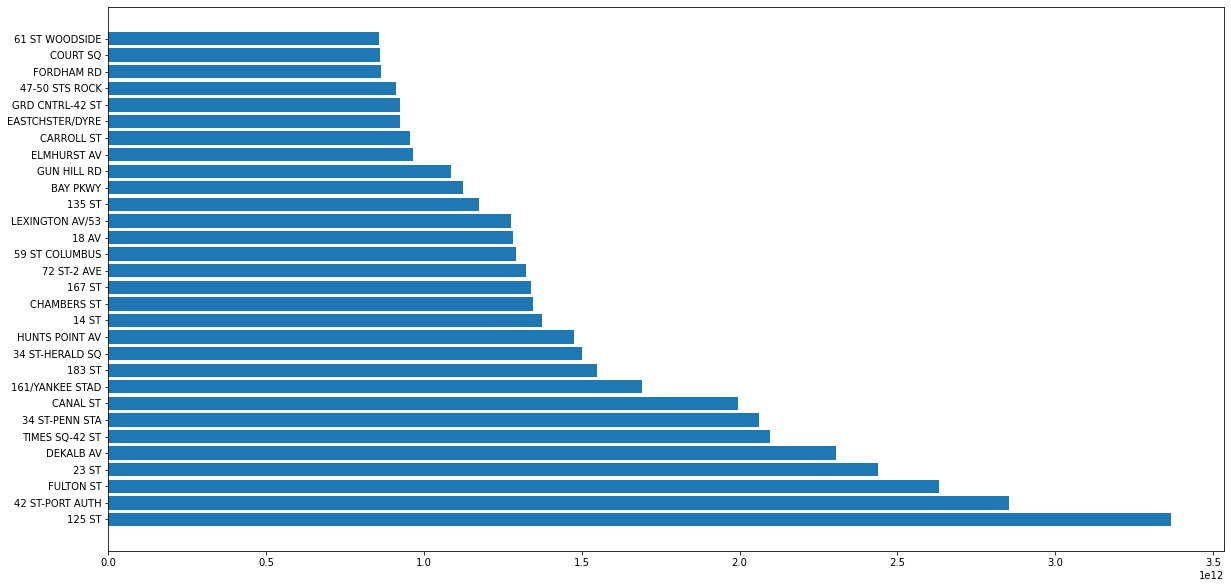

In [80]:
plt.figure(figsize=(20,10))
plt.barh(y = dens.index, width = dens,)